"plot.bar(steps, distribution_fun / numOfPoints, width=h, color=(0.2, 0.6, 0.3, 0.4))

plot.plot(data, stats.cauchy.cdf(np.array(data), loc=20.983422419520274, scale=1), 'r')
plot.plot(data, stats.laplace.cdf(np.array(data), loc=1, scale=1), 'g')

Min - 10.000000
Max - 20.000000


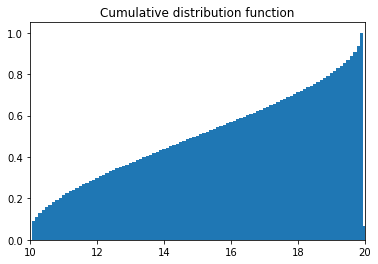

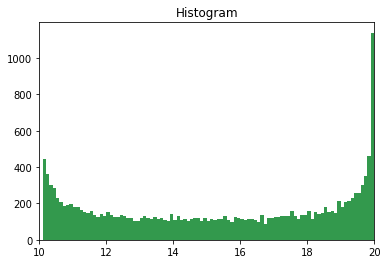

In [4]:
import math
import matplotlib.pyplot as plot
import statistics as stat
import scipy.stats as stats
import numpy as np
import random
import help
%matplotlib inline

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

relay_SDVIG = 0

f = open("Task_3a.txt", 'r')
line = f.readline().split(" ")
data = []
data2 = [[], [], [], [], [], [], [], [], [], []]
numOfPoints = int(line[2])
numOfPointsInOneUnderArray = numOfPoints / 10

for t in f.readline().split(" "):
    if t != '':
        data.append(float(t))

# создание 10 подвыборок
res = 0
random.shuffle(data)
for i in range(numOfPoints):
    j = int(i // numOfPointsInOneUnderArray)
    res += data[i]
    data2[j].append(data[i])

# сортировка значений
list.sort(data)
for l in data2:
    list.sort(l)
# ===========================  функция распределения и гистограммы =====================
m = 100  # кол-во интервалов
numbers = []
for number in data:
    if number < 50000:
        if number > -500000:
            numbers.append(number)
#
min_value = min(numbers)  # минимальное значение в выборке
max_value = max(numbers)  # максимальное значение в выборке
print("Min - %f" % min_value)
print("Max - %f" % max_value)
distribution_fun = np.zeros(m)
h = (max_value - min_value) / m  # шаг, с которым идут интервалы
steps = []  # массив точек с шагом h
for t in range(1, m + 1):
    steps.append(t * h + min_value)

index = 0
for value in numbers:
    if value > steps[index]:
        p = int(abs(steps[index] - value) / h) + 1
        for i in range(1, p):
            distribution_fun[index + i] = distribution_fun[index]
        distribution_fun[index] = distribution_fun[index - 1]
        index += p
    distribution_fun[index - 1] += 1

plot.title("Cumulative distribution function")
plot.xlim([min_value, max_value])  # CHANGE
plot.bar(steps, distribution_fun / len(numbers), h)
plot.show()
plot.title("Histogram")
plot.xlim([min_value, max_value])  # CHANGE
plot.hist(numbers, steps, color=(0.2, 0.6, 0.3, 1.0))
plot.show()

Histogram area:  1.0000000000000002


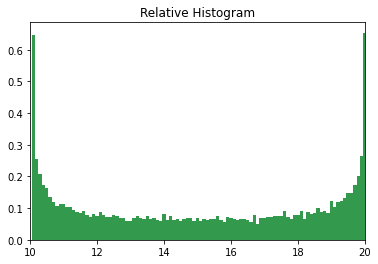

In [5]:
index = 0
for_relative = np.zeros(m)
steps = []  # массив точек с шагом h
for t in range(1, m + 1):
    steps.append(min_value + t * h)
for value in numbers:
    if value > steps[index]:
        p = int(abs(steps[index] - value) // h) + 1
        for_relative[index] = for_relative[index] / (h * len(numbers))
        index += p
    for_relative[index] += 1
for_relative[m - 1] = for_relative[m - 1] / (h * len(numbers))

# Проверка площади под гистограммой
ssss_____ = 0
for v in for_relative:
    ssss_____ += v * h
print('Histogram area: ', str(ssss_____))
# Конец проверки площади


plot.bar(steps, for_relative, width=h, color=(0.2, 0.6, 0.3, 1.0))
plot.title("Relative Histogram")
plot.xlim([min(numbers), max(numbers)])  # CHANGE
plot.show()

In [6]:
max_value = max(data)
print("================== ТОЧЕЧНЫЕ ОЦЕНКИ =========================")
empty = np.zeros(11)
median = [stat.median(data)]  # медианы
mean = [stat.mean(data)]  # среднее арифметическое (мат. ожидание)
mid_range = [(min_value + max_value) / 2]  # средина размаха
dispersion = [help.dispersion(data, mean[0])]  # дисперсия s^2
root_of_dispersion = [math.sqrt(dispersion[0])]  # корень из дисперсии s
third_central_moment = [help.central_moment(data, 3, mean[0])]  # 3-ий центральный момент
fourth_central_moment = [help.central_moment(data, 4, mean[0])]  # 4-ый центральный момент
asymmetry = [help.asymmetry(third_central_moment[0], root_of_dispersion[0])]  # асимметрия
kurtosis = [help.kurtosis(fourth_central_moment[0], dispersion[0])]  # эксцесс

interquantile_interval = help.interquantile_interval(numOfPoints, 0.5)  # интерквантильный интервал

index = 1
for n in data2:
    median.append(stat.median(n))
    mean.append(stat.mean(n))
    mid_range.append((min(n) + max(n)) / 2)
    dispersion.append(help.dispersion(n, mean[index]))
    root_of_dispersion.append((math.sqrt(dispersion[index])))
    third_central_moment.append(help.central_moment(n, 3, mean[index]))
    fourth_central_moment.append(help.central_moment(n, 4, mean[index]))
    asymmetry.append(third_central_moment[index] / pow(root_of_dispersion[index], 3))
    kurtosis.append(help.kurtosis(fourth_central_moment[index], dispersion[index]))
    index += 1

print("Выборка\t!x\tx_med\tx_ср\ts\ts^2\t∘µ_3\t∘µ_4\tAs\tEx")
for i in range(len(median)):
    if i == 0:
        data_name = "Full"
    else:
        data_name = str(i)
    print("%s\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f" % (data_name, median[i], mean[i], mid_range[i], dispersion[i],
                                                      root_of_dispersion[i], third_central_moment[i],
                                                      fourth_central_moment[i], asymmetry[i], kurtosis[i]))
print("Границы интерквантильного промежутка для P = 0.95:")
print("J = (%d, %d) :" % interquantile_interval)
print("По номерам точек:")
print("J = (%f, %f) " % (data[interquantile_interval[0]], data[interquantile_interval[1] - 1]))

================== ТОЧЕЧНЫЕ ОЦЕНКИ =========================
Выборка	!x	x_med	x_ср	s	s^2	∘µ_3	∘µ_4	As	Ex
Full	15.056300	15.025796	15.000000	12.496052	3.534976	-0.545811	234.854064	-0.082123	1.504016
1	14.935050	15.053468	15.000000	12.721462	3.566716	-1.368812	241.328297	-0.030167	1.491194
2	15.017700	15.024617	15.000050	12.368192	3.516844	0.024224	229.169473	0.000557	1.498112
3	15.395900	15.190371	15.000000	12.168966	3.488404	-3.855923	228.968816	-0.090834	1.546212
4	15.075800	15.025288	15.000050	12.839327	3.583201	-0.765246	243.812085	-0.016634	1.479009
5	15.076900	15.044836	15.000000	12.607443	3.550696	-0.982257	237.698617	-0.021942	1.495452
6	15.053150	14.956213	15.000000	12.174776	3.489237	-0.223786	224.736214	-0.005268	1.516181
7	14.951650	14.992286	14.999950	12.587898	3.547943	0.768113	239.262027	0.017199	1.509967
8	15.144500	15.036290	15.000000	12.410894	3.522910	-0.380138	229.923587	-0.008694	1.492717
9	14.737300	14.927960	15.000050	12.480928	3.532836	1.494343	236.291110	0.0338

Графики точечных показателей

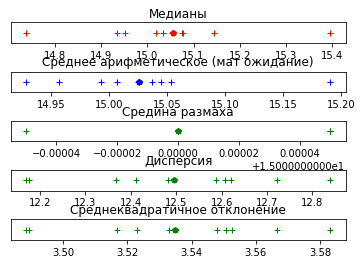

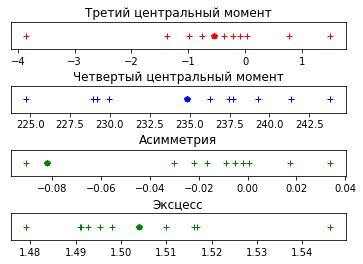

In [7]:
plot.figure()

ax1 = plot.subplot(9, 1, 1)
ax1.set_ylim(-0.1, 0.1)
ax1.set_yticks([])
ax1.set_yticklabels([])
plot.title('Медианы')
plot.plot(median, empty, 'r+')
plot.plot(median[0], 0, 'rp')

ax2 = plot.subplot(9, 1, 3)
ax2.set_yticklabels([])
ax2.set_yticks([])
plot.title('Среднее арифметическое (мат ожидание)')
plot.plot(mean, empty, 'b+')
plot.plot(mean[0], 0, 'bp')

ax3 = plot.subplot(9, 1, 5)
ax3.set_yticks([])
ax3.set_yticklabels([])
plot.title('Средина размаха')
plot.plot(mid_range, empty, 'g+')
plot.plot(mid_range[0], 0, 'gp')

ax4 = plot.subplot(9, 1, 7)
ax4.set_yticks([])
ax4.set_yticklabels([])
plot.title('Дисперсия')
plot.plot(dispersion, empty, 'g+')
plot.plot(dispersion[0], 0, 'gp')

ax5 = plot.subplot(9, 1, 9)
ax5.set_yticks([])
ax5.set_yticklabels([])
plot.title('Среднеквадратичное отклонение')
plot.plot(root_of_dispersion, empty, 'g+')
plot.plot(root_of_dispersion[0], 0, 'gp')

plot.show()
plot.close()

plot.figure()
ax1 = plot.subplot(7, 1, 1)
ax1.set_ylim(-0.1, 0.1)
ax1.set_yticks([])
ax1.set_yticklabels([])
plot.title('Третий центральный момент')
plot.plot(third_central_moment, empty, 'r+')
plot.plot(third_central_moment[0], 0, 'rp')

ax2 = plot.subplot(7, 1, 3)
ax2.set_yticklabels([])
ax2.set_yticks([])
plot.title('Четвертый центральный момент')
plot.plot(fourth_central_moment, empty, 'b+')
plot.plot(fourth_central_moment[0], 0, 'bp')

ax3 = plot.subplot(7, 1, 5)
ax3.set_yticks([])
ax3.set_yticklabels([])
plot.title('Асимметрия')
plot.plot(asymmetry, empty, 'g+')
plot.plot(asymmetry[0], 0, 'gp')

ax4 = plot.subplot(7, 1, 7)
ax4.set_yticks([])
ax4.set_yticklabels([])
plot.title('Эксцесс')
plot.plot(kurtosis, empty, 'g+')
plot.plot(kurtosis[0], 0, 'gp')
plot.show()
plot.close()

Выборка	Мат.ожидание	Дисперсия
	(Левая, правая)	(Левая, правая)
Full	(14.991451,15.060142)	(12.325683,12.669088)
1	(14.943884,15.163052)	(12.548019,12.897619)
2	(14.916565,15.132668)	(12.199566,12.539458)
3	(15.083193,15.297549)	(12.003056,12.337473)
4	(14.915198,15.135378)	(12.664277,13.017117)
5	(14.935745,15.153928)	(12.435555,12.782022)
6	(14.849010,15.063416)	(12.008786,12.343363)
7	(14.883279,15.101293)	(12.416276,12.762206)
8	(14.928052,15.144528)	(12.241686,12.582751)
9	(14.819417,15.036503)	(12.310764,12.653754)
10	(14.897485,15.115786)	(12.448981,12.795821)


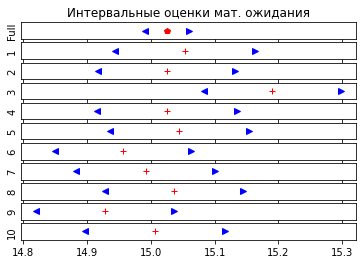

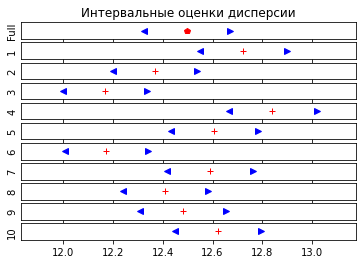

In [8]:
Q = 0.8  # доверительная вероятность

left_chi2inv = stats.chi2.ppf((1 + Q) / 2, numOfPoints)
right_chi2inv = stats.chi2.ppf((1 - Q) / 2, numOfPoints)
tinv = 1.2816  # посчитано в MATLAB функцией tinv((1+q)/2, n), 0.9 = (1+q)/2, где q=0.8
mean_interval = [help.mean_interval(numOfPoints, mean[0], root_of_dispersion[0], tinv)]
dispersion_interval = [help.dispersion_interval(numOfPoints, dispersion[0], left_chi2inv, right_chi2inv)]

for i in range(1, 11):
    mean_interval.append(help.mean_interval(numOfPointsInOneUnderArray, mean[i], root_of_dispersion[i], tinv))
    dispersion_interval.append(help.dispersion_interval(numOfPoints, dispersion[i], left_chi2inv, right_chi2inv))
print("Выборка\tМат.ожидание\tДисперсия")
print("\t(Левая, правая)\t(Левая, правая)")
for i in range(len(mean_interval)):
    if i == 0:
        data_name = "Full"
    else:
        data_name = str(i)
    print("%s\t(%f,%f)\t(%f,%f)" % (
    data_name, mean_interval[i][0], mean_interval[i][1], dispersion_interval[i][0], dispersion_interval[i][1]))

# Для мат. ожидания
plot.figure()
axes = [plot.subplot(11, 1, 1)]
axes[0].set_yticks([])
axes[0].set_ylabel('Full')
plot.title('Интервальные оценки мат. ожидания')
plot.setp(axes[0].get_xticklabels(), visible=False)
plot.plot(mean[0], 0, 'rp')
plot.plot(mean_interval[0][0], 0, 'b<')
plot.plot(mean_interval[0][1], 0, 'b>')

for i in range(1, 11):
    axes.append(plot.subplot(11, 1, i + 1, sharex=axes[0]))
    axes[i].set_yticks([])
    axes[i].set_ylabel(str(i))
    if i < 10: plot.setp(axes[i].get_xticklabels(), visible=False)
    plot.plot(mean[i], 0, 'r+')
    plot.plot(mean_interval[i][0], 0, 'b<')
    plot.plot(mean_interval[i][1], 0, 'b>')
mat_razmach = max(mean) - min(mean)
axes[0].set_xlim([min(mean) - 0.5 * mat_razmach, max(mean) + 0.5 * mat_razmach])  # CHANGE
plot.show()
plot.close()

# Для дисперсии

plot.figure()
axes = [plot.subplot(11, 1, 1)]
axes[0].set_yticks([])
axes[0].set_ylabel('Full')
plot.title('Интервальные оценки дисперсии')
plot.setp(axes[0].get_xticklabels(), visible=False)
plot.plot(dispersion[0], 0, 'rp')
plot.plot(dispersion_interval[0][0], 0, 'b<')
plot.plot(dispersion_interval[0][1], 0, 'b>')

for i in range(1, 11):
    axes.append(plot.subplot(11, 1, i + 1, sharex=axes[0]))
    axes[i].set_yticks([])
    axes[i].set_ylabel(str(i))
    if i < 10: plot.setp(axes[i].get_xticklabels(), visible=False)
    plot.plot(dispersion[i], 0, 'r+')
    plot.plot(dispersion_interval[i][0], 0, 'b<')
    plot.plot(dispersion_interval[i][1], 0, 'b>')
disp_razmach = max(dispersion) - min(dispersion)
axes[0].set_xlim([min(dispersion) - 0.5 * disp_razmach, max(dispersion) + 0.5 * disp_razmach])
plot.show()
plot.close()

Интервальные оценки интерквантильного промежутка для P = 0.95
Непараметрические толерантные пределы для всей выборки симметричные относительно среднего значения.
Кол-во отбрасываемых точек k было найдено с помощью биномиального распределения.

k = 895
Толерантные пределы для всей выборки относительно среднего: [10.019000, 19.984700]


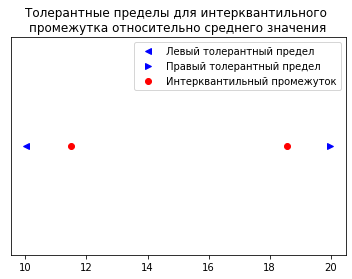

Толерантные пределы для всей выборки относительно нуля: [-19.939500, 19.939500]


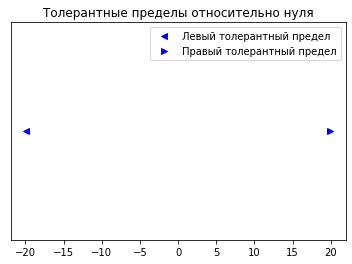

Параметрические толерантные интервалы для подвыборок
Номер подвыборки	(Левый, Правый)
0	[8.062705, 8.062705]
1	[8.131602, 8.131602]
2	[8.353098, 8.353098]
3	[8.002215, 8.002215]
4	[8.085472, 8.085472]
5	[8.117308, 8.117308]
6	[8.038318, 8.038318]
7	[8.131387, 8.131387]
8	[8.003602, 8.003602]
9	[8.043515, 8.043515]


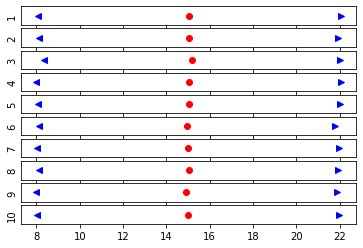

In [9]:
p = 0.95  # вероятность для интерквантильного промежутка
tolerant_interval_average = [0, 0]  # массив для толерантных пределов

k = help.find_k(numOfPoints, p, Q)  # кол-во отбрасываемых точек
print("k = %d" % k)
# Для всей выборки относительно среднего арифметического
if k % 2 == 0:
    left_lim = int(k / 2)
    right_lim = int(numOfPoints - k / 2)
    tolerant_interval_average[0], tolerant_interval_average[1] = data[left_lim], data[right_lim]
else:
    left_lim = int((k - 1) / 2)
    right_lim = int(numOfPoints - (k - 1) / 2)
    tolerant_interval_average[0], tolerant_interval_average[1] = data[left_lim], data[right_lim]

# Для всей выборки относительно нуля
# Для этого возьмем модули отрицательных значений и пересортируем выборку
data_abs = np.sort(abs(np.array(data)))
tolerant_interval_zero = [-data_abs[numOfPoints - k + 1], data_abs[numOfPoints - k + 1]]

print("Толерантные пределы для всей выборки относительно среднего: [%f, %f]" %(tolerant_interval_average[0], tolerant_interval_average[1]))
plot.title("Толерантные пределы для интерквантильного \nпромежутка относительно среднего значения")
plot.yticks([])
plot.plot(tolerant_interval_average[0], 0, 'b<')
plot.plot(tolerant_interval_average[1], 0, 'b>')
plot.plot(data[interquantile_interval[0]], 0, 'ro')
plot.plot(data[interquantile_interval[1]], 0, 'ro')
plot.legend(("Левый толерантный предел", "Правый толерантный предел", "Интерквантильный промежуток"), loc='upper right')
plot.show()
plot.close()

print("Толерантные пределы для всей выборки относительно нуля: [%f, %f]" %(tolerant_interval_zero[0], tolerant_interval_zero[1]))
plot.title("Толерантные пределы относительно нуля")
plot.yticks([])
plot.plot(tolerant_interval_zero[0], 0, 'b<')
plot.plot(tolerant_interval_zero[1], 0, 'b>')
plot.legend(("Левый толерантный предел", "Правый толерантный предел"), loc='upper right')
plot.show()
plot.close()

# Считаем параметрические толерантные пределы подвыборок
k_tolerant_multiplier = 1.96
parametric_tolerant_interval = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
for i in range(10):
    parametric_tolerant_interval[i][0] = mean[i + 1] - k_tolerant_multiplier * root_of_dispersion[i + 1]
    parametric_tolerant_interval[i][1] = mean[i + 1] + k_tolerant_multiplier * root_of_dispersion[i + 1]
print("Параметрические толерантные интервалы для подвыборок")
print("Номер подвыборки\t(Левый, Правый)")
for i in range(len(parametric_tolerant_interval)):
    print("%d\t[%f, %f]" %(i, parametric_tolerant_interval[i][0], parametric_tolerant_interval[i][0]))
axes = []
plot.title("Параметрические толерантные пределы для подвыборок")
for i in range(10):
    if i == 0:
        axes.append(plot.subplot(10, 1, i + 1))
    else:
        axes.append(plot.subplot(10, 1, i + 1, sharex=axes[0]))
    axes[i].set_yticks([])
    axes[i].set_ylabel(str(i + 1))
    if i < 9: plot.setp(axes[i].get_xticklabels(), visible=False)
    plot.plot(parametric_tolerant_interval[i][0], 0, 'b<')
    plot.plot(parametric_tolerant_interval[i][1], 0, 'b>')
    plot.plot(mean[i + 1], 0, 'ro')
plot.show()
plot.close()

Красные точки на графиках – это мат. ожидания подвыборок.
Как видно из графика толерантного предела интерквантильного промежутка всей выборки, толерантные пределы шире, чем интерквантильный промежуток.
А также на всех графиках мат. ожидания лежат посередине толерантного отрезка, за исключением толерантного отрезка, симметричного относительно нуля.

===========================МЕТОД МОМЕНТОВ==========================
Для нормального распредления: с = 15.025796, s = 3.534976
(15.025796454022986, 3.5348739800073252)


d:\pycharmprojects\probability-theory\venv\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


9.999999999999998 10.00071877812291


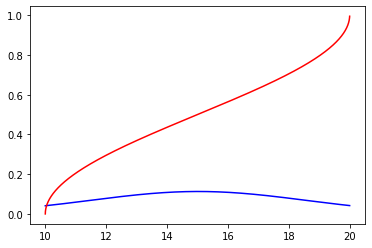

In [12]:
import pandas as pd


print("===========================МЕТОД МОМЕНТОВ==========================")
# Для нормального распредления
print("Для нормального распредления: с = %f, s = %f" %(mean[0],root_of_dispersion[0]))
print(stats.norm.fit(data))
loc, scale = stats.arcsine.fit(numbers)
print(loc, scale)
plot.plot(data, stats.norm.pdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]), 'b')
plot.plot(data, stats.arcsine.cdf(np.array(data), loc=loc, scale=scale), 'r')
plot.show()

In [ ]:
print("===========================МЕТОД МОМЕНТОВ==========================")
# Для нормального распредления
print("Для нормального распредления: с = %f, s = %f" %(mean[0],root_of_dispersion[0]))
plot.plot(data, stats.norm.cdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]), 'b')
print("Для распределения arcsin:")
plot.plot(data, stats.arcsine.cdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]*math.sqrt(2)), 'r')


a_for_laplace_moment_method = mean[0]
laplace_lambda_moment_method = math.sqrt(2 / dispersion[0])
print("Для распределения Лапласа")
print("a = " + str(a_for_laplace_moment_method) + " lambda = " + str(laplace_lambda_moment_method))

n_for_student_moment = (2 * dispersion[0]) / (dispersion[0] - 1)
print("Для распределения Стьюдента")
print("n = " + str(n_for_student_moment))

# ======================================= ММП ====================================================
print("===========================ММП==========================")

# Для нормального распределения
c_for_normal_mmp = 1 / numOfPoints * sum(data)
dispersion_for_normal_mmp = 1 / numOfPoints * sum((np.array(data) - c_for_normal_mmp) ** 2)
s_for_normal_mmp = math.sqrt(dispersion_for_normal_mmp)
print("Для нормального распределения")
print("c = " + str(c_for_normal_mmp) + " s = " + str(s_for_normal_mmp))

# Для распределения Лапласа
a_for_laplace_mmp = mean[0]
laplace_lambda_mmp = numOfPoints * (1 / sum(abs(np.array(data) - a_for_laplace_mmp)))
print("Для распределения Лапласа")
print("a = " + str(a_for_laplace_mmp) + " lambda = " + str(laplace_lambda_mmp))
#
# # Для Гамма-распределения
# # Числовые значения, которые нужно посчитать
for_optimize1 = 0
for_optimize2 = 0
square_sum = 0
for v in data:
    if v > 0:
        square_sum += v * v
        for_optimize1 += v
        for_optimize2 += np.log(v)
for_optimize3 = for_optimize1
for_optimize1 = np.log(for_optimize1 / numOfPoints)
for_optimize4 = for_optimize2
for_optimize2 = for_optimize2 / numOfPoints
c_mmp = for_optimize1 - for_optimize2

mu_for_student_mmp = 0.0267811
sigma_for_student_mmp = 1.03866
nu_for_student_mmp = 5.55669
"""
# ======================= Построим финции распределения и плотности вместе с гистограммой
"""
# Для нормального распределения
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
plot.title("Сравнение с плотностью нормального распределения")
# plot.xlim([0, 1000])
plot.bar(steps, for_relative, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.norm.pdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]), 'b')
plot.plot(data, stats.norm.pdf(np.array(data), loc=c_for_normal_mmp, scale=s_for_normal_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Гистограмма"), loc='upper right')
plot.show()
plot.close()

# !!!!!!!!!!!
plot.title("Сравнение с равномерным распределением")
# plot.xlim([0, 1000])
plot.bar(steps, distribution_fun / numOfPoints, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.uniform.cdf(np.array(data), loc=min_value, scale=max_value-min_value), 'b')
#plot.plot(data, stats.uniform.cdf(np.array(data), loc=c_for_normal_mmp, scale=s_for_normal_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Гистограмма"), loc='upper right')
plot.show()
plot.close()

plot.title("Сравнение с плотностью равномерного распределения")
# plot.xlim([0, 1000])
plot.bar(steps, for_relative, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.uniform.pdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]), 'b')
plot.plot(data, stats.uniform.pdf(np.array(data), loc=c_for_normal_mmp, scale=s_for_normal_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Гистограмма"), loc='upper right')
plot.show()
plot.close()

# !!!!!!!!!!!!!!!!!!!!!!!

plot.title("Сравнение с нормальным распределением")
# plot.xlim([0, 1000])
plot.bar(steps, distribution_fun / numOfPoints, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.norm.cdf(np.array(data), loc=mean[0], scale=root_of_dispersion[0]), 'b')
plot.plot(data, stats.norm.cdf(np.array(data), loc=c_for_normal_mmp, scale=s_for_normal_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Эмпирическая"), loc='upper right')
plot.show()
plot.close()

# Для распределения Лапласа

plot.title("Сравнение с плотностью распределения Лапласа")
# plot.xlim([0, 1000])
plot.bar(steps, for_relative, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data,
          stats.laplace.pdf(np.array(data), loc=a_for_laplace_moment_method, scale=1 / laplace_lambda_moment_method),
          'b')
plot.plot(data, stats.laplace.pdf(np.array(data), loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Гистограмма"), loc='upper right')
plot.show()
plot.close()

plot.title("Сравнение с распределением Лапласа")
# plot.xlim([0, 1000])
plot.bar(steps, distribution_fun / numOfPoints, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.laplace.cdf(np.array(data), loc=mean[0], scale=1 / laplace_lambda_moment_method), 'b')
plot.plot(data, stats.laplace.cdf(np.array(data), loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Эмпирическая"), loc='upper right')
plot.show()
plot.close()


plot.title("Сравнение с плотностью распределения Стьюдента")
# plot.xlim([0, 4.1])
# plot.ylim([0, 0.25])
plot.bar(steps, for_relative, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.t.pdf(np.array(data), n_for_student_moment, scale=1), 'b')
plot.plot(data, stats.t.pdf(np.array(data), nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp),
          'r')
# plot.plot(data, stats.rayleigh.pdf(np.array(data), relay_SDVIG, scale=disp_for_relay_mmp), 'r')
plot.legend(("Метод моментов", "ММП", "Гистограмма"), loc='upper right')
plot.show()
plot.close()

plot.title("Сравнение с распределением Стьюдента")
# plot.xlim([0, 4.1])
plot.bar(steps, distribution_fun / numOfPoints, width=h, color=(0.2, 0.6, 0.3, 0.4))
plot.plot(data, stats.t.cdf(np.array(data), n_for_student_moment, scale=1), 'b')
plot.plot(data, stats.t.cdf(np.array(data), nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp),
          'r')
# plot.plot(data, stats.rayleigh.cdf(np.array(data), relay_SDVIG, scale=disp_for_relay_mmp), 'r')
plot.legend(("Метод моментов", "Matlab", "Эмпирическая"), loc='upper right')
plot.show()
plot.close()
"""
"""
# ========================== ПРОВЕРКА ГИПОТЕЗ ============================================
print("========================== ПРОВЕРКА ГИПОТЕЗ ==============================")
# _nk  - кол-во точек, попавших в k-ый интервал
_nk = np.empty(m)
index = 0
for val in distribution_fun:
    if index == 0:
        _nk[index] = val
    else:
        _nk[index] = val - distribution_fun[index - 1]
    index += 1

# =============== Хи-квадрат==============================================================
print("=============== Хи-квадрат статистика=====================")
print("\tКритическое значение = 22.3071")  # Значение получено в MATLAB CHANGE

print("\tДля нормального распределения")
index = 0
chi2_stat = 0
for i in range(m):
    if i == 0:
        ___Pk = stats.norm.cdf(steps[index], loc=mean[0], scale=root_of_dispersion[0]) - \
                stats.norm.cdf(min_value, loc=mean[0], scale=root_of_dispersion[0])
    else:
        ___Pk = stats.norm.cdf(steps[index], loc=mean[0], scale=root_of_dispersion[0]) - \
                stats.norm.cdf(steps[index - 1], loc=mean[0], scale=root_of_dispersion[0])
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля метода моментов = " + str(chi2_stat))

index = 0
chi2_stat = 0
for i in range(m):
    if i == 0:
        ___Pk = stats.norm.cdf(steps[index], loc=c_for_normal_mmp, scale=s_for_normal_mmp) - \
                stats.norm.cdf(min_value, loc=c_for_normal_mmp, scale=s_for_normal_mmp)
    else:
        ___Pk = stats.norm.cdf(steps[index], loc=c_for_normal_mmp, scale=s_for_normal_mmp) - \
                stats.norm.cdf(steps[index - 1], loc=c_for_normal_mmp, scale=s_for_normal_mmp)
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля ММП = " + str(chi2_stat))

print("\tДля распределения Лапласа")
index = 0
chi2_stat = 0
for i in range(m):
    if i == 0:
        ___Pk = stats.laplace.cdf(steps[index], loc=a_for_laplace_moment_method,
                                  scale=1 / laplace_lambda_moment_method) - \
                stats.laplace.cdf(min_value, loc=a_for_laplace_moment_method, scale=1 / laplace_lambda_moment_method)
    else:
        ___Pk = stats.laplace.cdf(steps[index], loc=a_for_laplace_moment_method,
                                  scale=1 / laplace_lambda_moment_method) - \
                stats.laplace.cdf(steps[index - 1], loc=a_for_laplace_moment_method,
                                  scale=1 / laplace_lambda_moment_method)
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля метода моментов = " + str(chi2_stat))

index = 0
chi2_stat = 0
for i in range(m):
    if i == 0:
        ___Pk = stats.laplace.cdf(steps[index], loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp) - \
                stats.laplace.cdf(min_value, loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp)
    else:
        ___Pk = stats.laplace.cdf(steps[index], loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp) - \
                stats.laplace.cdf(steps[index - 1], loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp)
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля ММП = " + str(chi2_stat))


print("\tДля распределения Стьюдента")
index = 0
chi2_stat = 0
for i in range(m):
    ___Pk = stats.t.cdf(steps[index], 0, scale=n_for_student_moment) - \
            stats.t.cdf(steps[index - 1], 0, scale=n_for_student_moment)
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля метода моментов = " + str(chi2_stat))

index = 0
chi2_stat = 0
for i in range(m):
    ___Pk = stats.t.cdf(steps[index], nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp) - \
            stats.t.cdf(steps[index - 1], nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp)
    chi2_stat += (numOfPoints * ___Pk - _nk[index]) ** 2 / (numOfPoints * ___Pk)
    index += 1
print("\t\tДля ММП = " + str(chi2_stat))

# =============== КОЛМАГОРОВА - СМИРНОВА==============================================================
print("=============== статистика КОЛМАГОРОВА - СМИРНОВА =====================")
___Dcrit = np.sqrt(- (np.log(0.5 * 0.05) / (2 * numOfPoints))) - 1 / (6 * numOfPoints)
print("\tКритическое значение = " + str(___Dcrit))

print("\tДля нормального распределения")
___D = 0
index = 1
for val in data:
    _____ddd = abs(stats.norm.cdf(val, loc=mean[0], scale=root_of_dispersion[0]) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля метода моментов = " + str(___D))

___D = 0
index = 1
for val in data:
    _____ddd = abs(stats.norm.cdf(val, loc=c_for_normal_mmp, scale=s_for_normal_mmp) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля ММП = " + str(___D))

print("\tДля распределения Лапласа")
___D = 0
index = 1
for val in data:
    _____ddd = abs(stats.laplace.cdf(val, loc=a_for_laplace_moment_method,
                                     scale=1 / laplace_lambda_moment_method) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля метода моментов = " + str(___D))

___D = 0
index = 1
for val in data:
    _____ddd = abs(stats.laplace.cdf(val, loc=a_for_laplace_mmp, scale=1 / laplace_lambda_mmp) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля ММП = " + str(___D))


print("\tДля распределения Стьюдента")
___D = 0
index = 1
for val in data:
    _____ddd = abs(stats.t.cdf(val, 0, scale=n_for_student_moment) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля метода моментов = " + str(___D))

___D = 0
index = 1
for val in data:
    _____ddd = abs(
        stats.t.cdf(val, nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp) - index / numOfPoints)
    if _____ddd > ___D: ___D = _____ddd
    index += 1
print("\t\tДля ММП = " + str(___D))

# ======================= критерий Мизеса ================================
print("=============== статистика Мизеса =====================")
print("\tКритическое значение = 0.2415")  # Значение взято из таблицы

print("\tДля нормального распределения")
___w = 0
index = 1
for val in data:
    ___w += (stats.norm.cdf(val, loc=mean[0], scale=root_of_dispersion[0]) - (2 * index - 1) / (2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля метода моментов = " + str(___w))


___w = 0
index = 1
for val in data:
    ___w += (stats.norm.cdf(val, loc=c_for_normal_mmp, scale=s_for_normal_mmp) - (2 * index - 1) / (
            2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля ММП = " + str(___w))

print("\tДля распределения Лапласа")
___w = 0
index = 1
for val in data:
    ___w += (stats.laplace.cdf(val, loc=a_for_laplace_moment_method,
                               scale=1 / laplace_lambda_moment_method) - (2 * index - 1) / (2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля метода моментов = " + str(___w))

___w = 0
index = 1
for val in data:
    ___w += (stats.laplace.cdf(val, loc=a_for_laplace_mmp,
                               scale=1 / laplace_lambda_mmp) - (2 * index - 1) / (2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля ММП = " + str(___w))


print("\tДля распределения Стьюдента")
___w = 0
index = 1
for val in data:
    ___w += (stats.t.cdf(val, 0, scale=n_for_student_moment) - (2 * index - 1) / (2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля метода моментов = " + str(___w))

___w = 0
index = 1
for val in data:
    ___w += (
                    stats.t.cdf(val, nu_for_student_mmp, scale=sigma_for_student_mmp, loc=mu_for_student_mmp) - (
                    2 * index - 1) / (2 * numOfPoints)) ** 2
    index += 1
___w = 1 / (12 * numOfPoints) + ___w
print("\t\tДля ММП = " + str(___w))